In [5]:
import pandas as pd
import matplotlib.pyplot as plt

cleaned_sales_data = pd.read_csv(r"C:\Users\torre\Downloads\cleaned_sales_data.csv")
cleaned_sales_data.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,366,4,2013-04-18,517,1,0,0,0,4422
1,394,6,2015-04-11,694,1,0,0,0,8297
2,807,4,2013-08-29,970,1,1,0,0,9729
3,802,2,2013-05-28,473,1,1,0,0,6513
4,726,4,2013-10-10,1068,1,1,0,0,10882


In [62]:
average_sales = cleaned_sales_data['sales'].mean()
average_sales

6959.657210259687

In [64]:
total_sales_by_store = cleaned_sales_data.groupby('store_ID')['sales'].sum()
total_sales_by_store

store_ID
1       2418077
2       2493044
3       3443248
4       4624267
5       2283572
         ...   
1111    2607237
1112    4950139
1113    3288394
1114    9953850
1115    3058095
Name: sales, Length: 1115, dtype: int64

In [68]:
average_sales_by_store = cleaned_sales_data.groupby('store_ID')['sales'].mean()
average_sales_by_store

store_ID
1        4769.382643
2        4907.566929
3        6886.496000
4        9714.846639
5        4650.859470
            ...     
1111     5320.891837
1112    10143.727459
1113     6643.220202
1114    20481.172840
1115     6215.640244
Name: sales, Length: 1115, dtype: float64

In [66]:
highest_avg_sales_store = average_sales_by_store.idxmax()
highest_avg_sales_store

817

In [70]:
lowest_avg_sales_store = average_sales_by_store.idxmin()
lowest_avg_sales_store

307

In [72]:
sales_by_day_of_week = cleaned_sales_data.groupby('day_of_week')['sales'].mean()
sales_by_day_of_week

day_of_week
1    8220.964004
2    7089.135868
3    6730.043373
4    6778.117485
5    7077.018521
6    5878.929657
7    8295.599222
Name: sales, dtype: float64

In [74]:
correlation_customers_sales = cleaned_sales_data['nb_customers_on_day'].corr(cleaned_sales_data['sales'])
correlation_customers_sales

0.8236592239942568

In [78]:
sales_by_holiday_type = cleaned_sales_data.groupby('state_holiday')['sales'].mean()
sales_by_holiday_type

state_holiday
0     6957.528761
a     8452.615385
b    10449.764706
c     9763.833333
Name: sales, dtype: float64

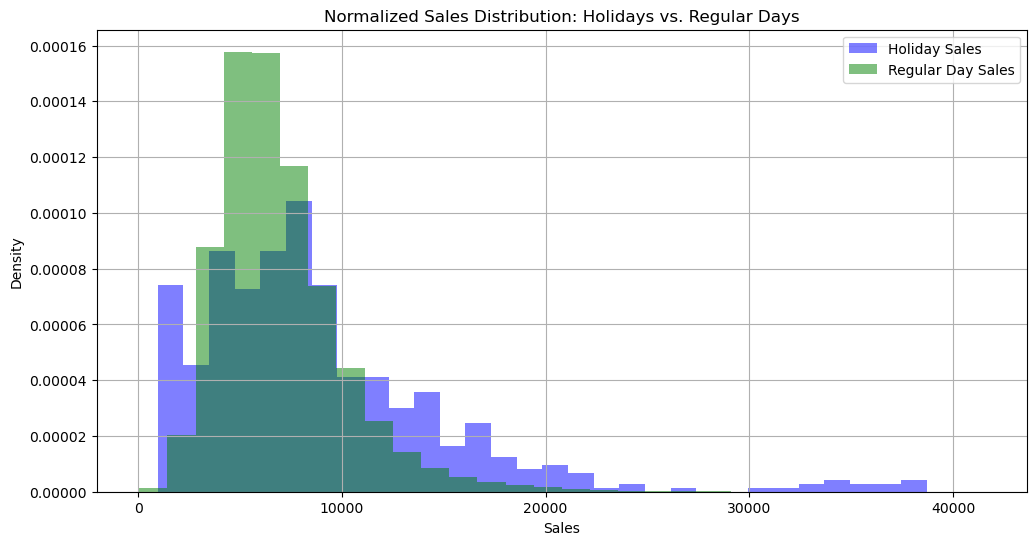

In [88]:
holiday_sales = cleaned_sales_data[cleaned_sales_data['state_holiday'] != '0']['sales']
regular_sales = cleaned_sales_data[cleaned_sales_data['state_holiday'] == '0']['sales']

plt.figure(figsize=(12, 6))
plt.hist(holiday_sales, bins=30, alpha=0.5, label='Holiday Sales', color='blue', density=True)
plt.hist(regular_sales, bins=30, alpha=0.5, label='Regular Day Sales', color='green', density=True)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Normalized Sales Distribution: Holidays vs. Regular Days')
plt.legend()
plt.grid(True)
plt.show()

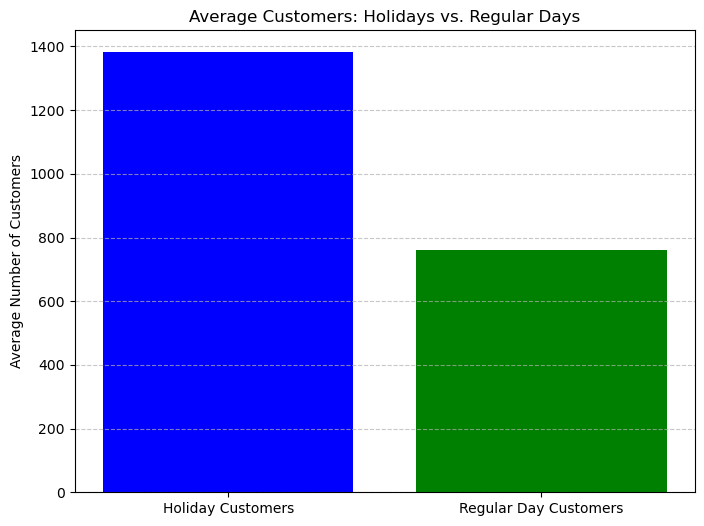

(1381.7046632124352, 762.330745230577)

In [19]:
holiday_customers_avg = cleaned_sales_data[cleaned_sales_data['state_holiday'] != '0']['nb_customers_on_day'].mean()
regular_customers_avg = cleaned_sales_data[cleaned_sales_data['state_holiday'] == '0']['nb_customers_on_day'].mean()
plt.figure(figsize=(8, 6))

plt.bar(['Holiday Customers', 'Regular Day Customers'], [holiday_customers_avg, regular_customers_avg], color=['blue', 'green'])
plt.ylabel('Average Number of Customers')
plt.title('Average Customers: Holidays vs. Regular Days')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
holiday_customers_avg, regular_customers_avg

In [13]:
store_with_highest_sales = cleaned_sales_data.groupby('store_ID')['sales'].sum().idxmax()
highest_sales_value = cleaned_sales_data.groupby('store_ID')['sales'].sum().max()

highest_sales_value, store_with_highest_sales

(12364158, 262)

In [15]:
day_with_highest_avg_sales = cleaned_sales_data.groupby('day_of_week')['sales'].mean().idxmax()
highest_avg_sales_value = cleaned_sales_data.groupby('day_of_week')['sales'].mean().max()

day_with_highest_avg_sales, highest_avg_sales_value

(7, 8295.599221789884)

In [21]:
store_with_lowest_sales = cleaned_sales_data.groupby('store_ID')['sales'].sum().idxmin()
lowest_sales_value = cleaned_sales_data.groupby('store_ID')['sales'].sum().min()

store_with_lowest_sales, lowest_sales_value

(307, 1267070)

In [23]:
lowest_sales_store_data = cleaned_sales_data[cleaned_sales_data['store_ID'] == store_with_lowest_sales]

holiday_open_days = lowest_sales_store_data[(lowest_sales_store_data['state_holiday'] != '0') & (lowest_sales_store_data['open'] == 1)].shape[0]
regular_open_days = lowest_sales_store_data[(lowest_sales_store_data['state_holiday'] == '0') & (lowest_sales_store_data['open'] == 1)].shape[0]

holiday_open_days, regular_open_days

(0, 468)

In [25]:
highest_sales_store_data = cleaned_sales_data[cleaned_sales_data['store_ID'] == store_with_highest_sales]


holiday_open_days_highest = highest_sales_store_data[(highest_sales_store_data['state_holiday'] != '0') & (highest_sales_store_data['open'] == 1)].shape[0]
regular_open_days_highest = highest_sales_store_data[(highest_sales_store_data['state_holiday'] == '0') & (highest_sales_store_data['open'] == 1)].shape[0]


holiday_open_days_highest, regular_open_days_highest

(18, 577)